In [11]:
from scipy.stats import fisher_exact
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
def somaticP(ingenes_y, inpathway_y,bg,inpathway_n):
    bg_lncRNAs    = 16825
    bg_lncRNAs_de = 3379
    contingency_table = [[ingenes_y, inpathway_y],[bg, inpathway_n]]
    return min(fisher_exact(contingency_table, alternative='less')[1],fisher_exact(contingency_table, alternative='greater')[1])

In [79]:
bg_lncRNAs_de =3379

In [46]:
def jaccard(A, B):
    if A or B:
        return len(A and B) / len(A or B)
    else:
        return 1.0

In [15]:
%store -r df1_ann
%store -r pathways_kegg_eng_ann_list

In [22]:
df1_ann.rename(columns={'gene_sym':'gene_sym_lncRNAs'},inplace=True)
pathways_kegg_eng_ann_list.rename(columns={'Process~name':'Pathway'},inplace=True)

In [23]:
pathways_kegg_eng_ann_list

,Pathway,gene_sym
0,AMPK,"PIK3R3, PPARGC1A, PRKAG3, PIK3R1, FOXO1, PPP2R..."
1,Adherens,"LEF1, NECTIN1, CSNK2A3, YES1, NECTIN3, TJP1, P..."
2,Aldosterone,"ATP2B1, CYP11A1, ATP1A1, ATP1A4, CALML6, CALM2..."
3,Aldosterone-regulated,"PIK3R3, NEDD4L, INS, FXYD2, ATP1A1, ATP1B1, PI..."
4,Alzheimer,"CHRM3, FZD4, FZD3, CALML6, CALML3, VDAC3, FZD9..."
...,...,...
67,Type,"PIK3R3, PIK3R1, PRKCZ, SOCS3, IRS2, INS, PIK3C..."
68,Vascular,"NPR2, KCNMB1, PLA2G2C, CALM2, CALML6, GUCY1A2,..."
69,Wnt,"LEF1, FZD4, CSNK2A3, APC, FZD3, FZD9, CXXC4, G..."
70,cAMP,"PIK3R3, ATP2B1, ATP1A1, PIK3R1, GRIN2B, ATP1A4..."


In [28]:
df1_ann_pathway_genes = pd.merge(pathways_kegg_eng_ann_list,df1_ann,on="Pathway")
df1_ann_pathway_genes

,Pathway,gene_sym,gene_group,num_of_Genes,gene_sym_lncRNAs,num_of_lncRNAs,diff
0,AMPK,"PIK3R3, PPARGC1A, PRKAG3, PIK3R1, FOXO1, PPP2R...",120,42,"LINC00685, AC129510.1, PCAT7, RAB11B-AS1, AC00...",55,65
1,Adherens,"LEF1, NECTIN1, CSNK2A3, YES1, NECTIN3, TJP1, P...",71,30,"AC104031.1, AC008467.1, AL133230.1, AC087482.1...",41,30
2,Aldosterone,"ATP2B1, CYP11A1, ATP1A1, ATP1A4, CALML6, CALM2...",98,37,"G2E3-AS1, AC120498.10, GNAS-AS1, LINC02489, LI...",44,54
3,Aldosterone-regulated,"PIK3R3, NEDD4L, INS, FXYD2, ATP1A1, ATP1B1, PI...",37,17,"CT69, AC010280.2, AC010735.2, ATP1B3-AS1, AC01...",22,15
4,Alzheimer,"CHRM3, FZD4, FZD3, CALML6, CALML3, VDAC3, FZD9...",369,107,"NDUFA6-DT, AC010973.2, AC078864.1, AC079336.5,...",132,237
...,...,...,...,...,...,...,...
64,Type,"PIK3R3, PIK3R1, PRKCZ, SOCS3, IRS2, INS, PIK3C...",46,20,"AC010280.2, AC010735.2, AC010735.1, AC019069.1...",27,19
65,Vascular,"NPR2, KCNMB1, PLA2G2C, CALM2, CALML6, GUCY1A2,...",133,46,"AP001453.2, AC104463.2, LINC01366, LINC01605, ...",68,65
66,Wnt,"LEF1, FZD4, CSNK2A3, APC, FZD3, FZD9, CXXC4, G...",166,51,"MIRLET7BHG, AC104031.1, AC100826.1, AP001453.2...",66,100
67,cAMP,"PIK3R3, ATP2B1, ATP1A1, PIK3R1, GRIN2B, ATP1A4...",216,74,"LINC02097, AC104825.1, AL139274.2, LINC02489, ...",105,111


1.Feature selection for the final input

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 5)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
mask = select_k_best_classifier.get_support()
new_features = features_dataframe.columns[mask]

In [65]:
df1_ann["diff"] = df1_ann['gene_group']-df1_ann['num_of_lncRNAs']


In [47]:
A=len(df1_ann_pathway_genes['gene_sym']) 
B=len(df1_ann_pathway_genes['gene_sym_lncRNAs']) 
A and B/A or B

1.0

In [48]:
#df1_ann[["num_of_lncRNAs","gene_group"]].apply(jaccard)
df1_ann_pathway_genes["jaccard"] = df1_ann_pathway_genes.apply(lambda row: jaccard(row['gene_sym_lncRNAs'], row['gene_sym']), axis=1)

In [101]:
contingency_table=[[df1_ann_pathway_genes.gene_group,df1_ann_pathway_genes.num_of_Genes],
[df1_ann_pathway_genes.bg,df1_ann_pathway_genes.num_of_lncRNAs]]
min(fisher_exact(contingency_table, alternative='less')[1],fisher_exact(contingency_table, alternative='greater')[1])

ValueError: The input `table` must be of shape (2, 2).

In [117]:
df1_ann_pathway_genes["p_value"] = df1_ann_pathway_genes.apply(lambda r: somaticP(r.gene_group,r.num_of_Genes,
                                                        r.bg,r.num_of_lncRNAs),axis=1)
df1_ann_pathway_genes.query('p_value<=0.05').shape

(69, 12)

In [119]:
df1_ann_pathway_genes.head()

,Pathway,gene_sym,gene_group,num_of_Genes,gene_sym_lncRNAs,num_of_lncRNAs,diff,jacc,bg,p,p-value,p_value
0,AMPK,"PIK3R3, PPARGC1A, PRKAG3, PIK3R1, FOXO1, PPP2R...",120,42,"LINC00685, AC129510.1, PCAT7, RAB11B-AS1, AC00...",55,65,0.494400,3379,8.900866e-33,8.900866e-33,8.900866e-33
1,Adherens,"LEF1, NECTIN1, CSNK2A3, YES1, NECTIN3, TJP1, P...",71,30,"AC104031.1, AC008467.1, AL133230.1, AC087482.1...",41,30,0.453564,3379,2.109914e-29,2.109914e-29,2.109914e-29
2,Aldosterone,"ATP2B1, CYP11A1, ATP1A1, ATP1A4, CALML6, CALM2...",98,37,"G2E3-AS1, AC120498.10, GNAS-AS1, LINC02489, LI...",44,54,0.555556,3379,6.521074e-33,6.521074e-33,6.521074e-33
3,Aldosterone-regulated,"PIK3R3, NEDD4L, INS, FXYD2, ATP1A1, ATP1B1, PI...",37,17,"CT69, AC010280.2, AC010735.2, ATP1B3-AS1, AC01...",22,15,0.500000,3379,4.988557e-22,4.988557e-22,4.988557e-22
4,Alzheimer,"CHRM3, FZD4, FZD3, CALML6, CALML3, VDAC3, FZD9...",369,107,"NDUFA6-DT, AC010973.2, AC078864.1, AC079336.5,...",132,237,0.498356,3379,3.706152e-40,3.706152e-40,3.706152e-40


In [109]:
somaticP(df1_ann_pathway_genes.gene_group,df1_ann_pathway_genes.num_of_Genes,
                                                        df1_ann_pathway_genes.bg,df1_ann_pathway_genes.num_of_lncRNAs)

ValueError: The input `table` must be of shape (2, 2).

In [56]:
pd.crosstab(df1_ann_pathway_genes['gene_group']>0, df1_ann_pathway_genes['num_of_lncRNAs']>0)
bg_lncRNAs = 16825
bg_lncRNAs_de = 3379

[[df1_ann_pathway_genes['gene_group'], df1_ann_pathway_genes['num_of_Genes']],[bg_lncRNAs_de, df1_ann_pathway_genes['num_of_lncRNAs']]]


[[0      55
  1      41
  2      44
  3      22
  4     132
       ... 
  64     27
  65     68
  66     66
  67    105
  68     89
  Name: num_of_lncRNAs, Length: 69, dtype: int64,
  0      65
  1      30
  2      54
  3      15
  4     237
       ... 
  64     19
  65     65
  66    100
  67    111
  68     78
  Name: diff, Length: 69, dtype: int64],
 [0      65
  1      30
  2      54
  3      15
  4     237
       ... 
  64     19
  65     65
  66    100
  67    111
  68     78
  Name: diff, Length: 69, dtype: int64,
  0     120
  1      71
  2      98
  3      37
  4     369
       ... 
  64     46
  65    133
  66    166
  67    216
  68    167
  Name: gene_group, Length: 69, dtype: int64]]

In [ ]:
# Feature elimination Mar23

In [13]:
%store -r common_de

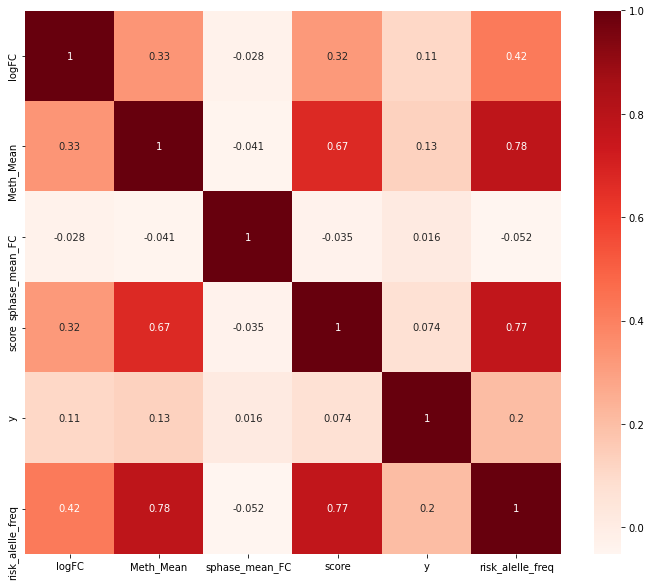

In [14]:
plt.figure(figsize=(12,10))
cor = common_de.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
#Correlation with output variable
cor_target = abs(cor["risk_alelle_freq"])

In [21]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Meth_Mean           0.779297
score               0.771916
risk_alelle_freq    1.000000
Name: risk_alelle_freq, dtype: float64

In [22]:
print(common_de[["Meth_Mean","score"]].corr())
print(common_de[["risk_alelle_freq","Meth_Mean"]].corr())

           Meth_Mean    score
Meth_Mean    1.00000  0.67402
score        0.67402  1.00000
                  risk_alelle_freq  Meth_Mean
risk_alelle_freq          1.000000   0.779297
Meth_Mean                 0.779297   1.000000


In [23]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

NameError: name 'LassoCV' is not defined